## Esercitazione 7 -  9 Aprile 2024

## Esercizio 2


Calcolare il punto di minimo delle seguenti due funzioni 
   $$\frac{1}{2}(0.001(x-1)^2+(x^2-y)^2)$$
   $$ (x^2 - y^2)^2 + (x - 1)^2$$
   $$sin\left (\frac{x^2}{2}-\frac{y^2}{4}\right)cos(2x-e^y)$$



In [47]:
import sympy as sym
import numpy as np
import numpy.linalg as npl
import math
import sys, os
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('../Scheletri'))

import Schel_FULL as sf

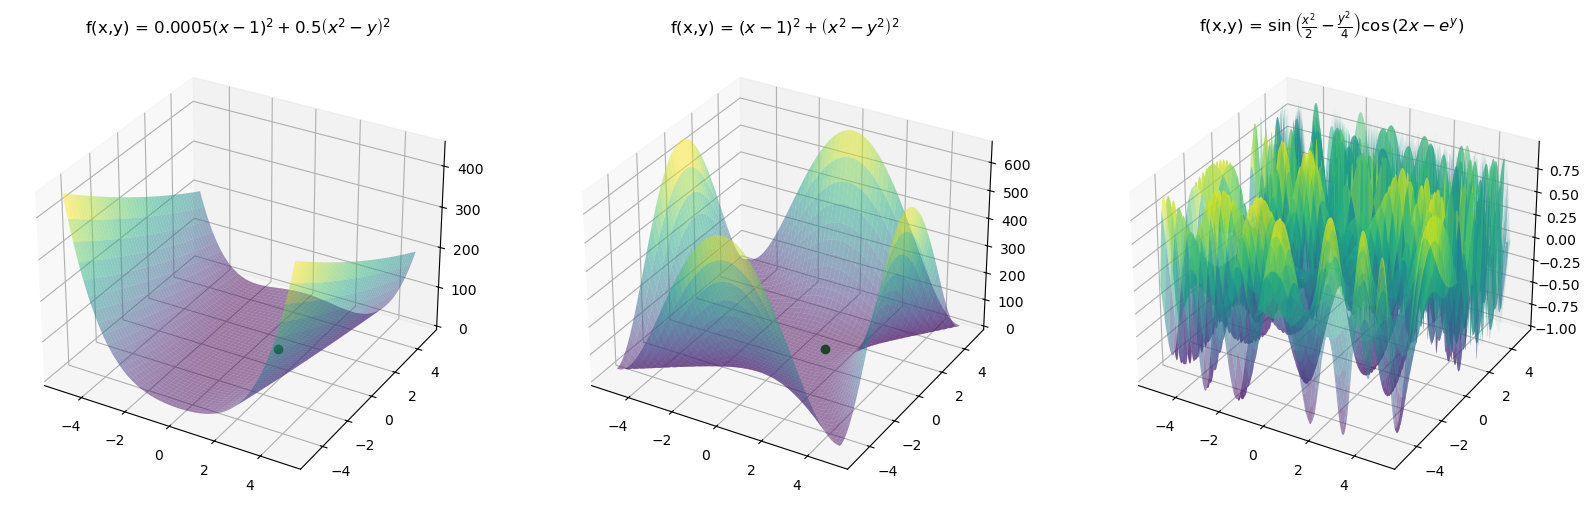

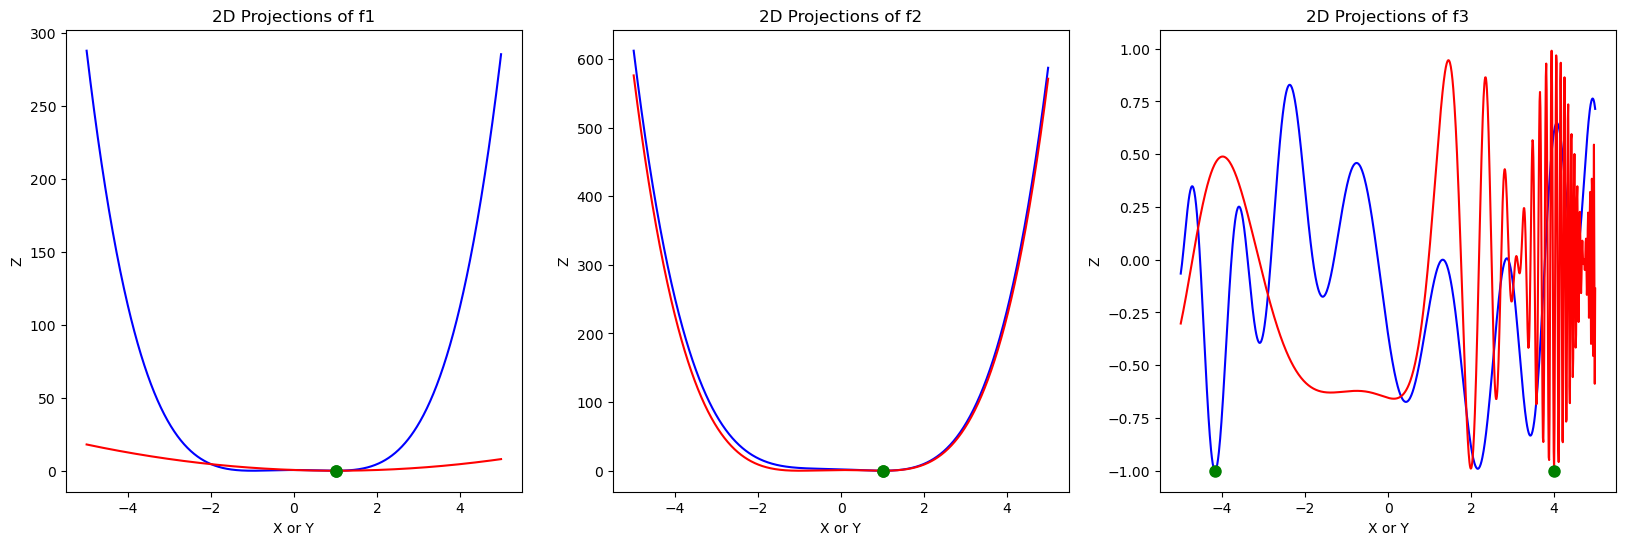

In [55]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

def hessian(fun_sym, varlist):
    hess_sym = sym.hessian(fun_sym, varlist)
    return np.array([[sym.lambdify(varlist, hess_sym[i,j]) for i in range(len(varlist))] for j in range(len(varlist))])

def gradient(fun_sym, varlist):
    grad_sym = [sym.diff(fun_sym, xi) for xi in varlist]
    return np.array([sym.lambdify(varlist, di, np) for di in grad_sym])

x = sym.symbols('x y')

tolx, tolf = (1e-12, 1e-12)
maxit = 1000

f1 = 1/2 * (0.001 * (x[0]-1)**2 + (x[0]**2 - x[1])**2)
f2 = (x[0]**2 - x[1]**2)**2 + (x[0]-1)**2
f3 = sym.sin((x[0]**2)/2 - (x[1]**2)/4) * sym.cos(2*x[0] - sym.exp(x[1]))

fun_syms = [f1,f2,f3]
functions = [sym.lambdify(x, f, np) for f in fun_syms]
fun_hessians = [hessian(f, x) for f in fun_syms]

fig, ax = plt.subplots(1, 3, figsize=(20, 6), subplot_kw={'projection': '3d'})
fig2, bx = plt.subplots(1, 3, figsize=(20, 6))

xx = np.arange(-5.0, 5.0, 0.01)
yy = np.arange(-5.0, 5.0, 0.01)
x0s = np.array([[0, 0], [1, 1], [-4, 4]])
X, Y = np.meshgrid(xx, yy)

for i in range(len(functions)):
    # Plot the 3D surface
    ax[i].plot_surface(X, Y, functions[i](X, Y), alpha=0.5, cmap='viridis')
    ax[i].set_title(rf"f(x,y) = ${sym.latex(fun_syms[i])}$")
    
    # Solve using Newton's method for minimum
    sol, numit, vec_sol = sf.newton_minimo_MOD(gradient(fun_syms[i], x), hessian(fun_syms[i], x), [x0s[i][0], x0s[i][1]], tolx, tolf, maxit)
    
    # Plot the solution point on the 3D surface
    ax[i].plot(sol[0], sol[1], functions[i](sol[0], sol[1]), 'go', label='Solution')

    ### XZ Projection
    Z_proj_xz = functions[i](xx, sol[1]*np.ones_like(xx))  # Use the Y-coordinate from the solution
    bx[i].plot(xx, Z_proj_xz, label='XZ Projection', color='blue')
    
    # Project the solution onto the XZ plane (Y=constant)
    bx[i].plot(sol[0], functions[i](sol[0], sol[1]), 'go', label='Solution (XZ)', markersize=8)

    ### YZ Projection
    Z_proj_yz = functions[i](sol[0]*np.ones_like(yy), yy)  # Use the X-coordinate from the solution
    bx[i].plot(yy, Z_proj_yz, label='YZ Projection', color='red')

    # Project the solution onto the YZ plane (X=constant)
    bx[i].plot(sol[1], functions[i](sol[0], sol[1]), 'go', label='Solution (YZ)', markersize=8)

    # Formatting for 2D plots
    bx[i].set_title(f"2D Projections of f{i+1}")
    bx[i].set_xlabel("X or Y")
    bx[i].set_ylabel("Z")
    #bx[i].legend()

plt.show()


## Esercizio 3
Scrivere una funzione numpy che calcola la norma infinito e la norma 1 di un vettore ed una matrice  e testarla su vettori e matrici  a propria scelta. Confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

(Ricorda la formula della norma infinito e della norma 1 di una matrice
$||A||_\infty= \max_{j=1,n} \sum_{i} |a_{ij}| $
$\quad ||A||_1= \max_{i=1,n} \sum_{j} |a_{ij}| $)

In [56]:
import numpy as np

def norm_inf_vector(v):
    """Calcola la norma infinito di un vettore."""
    return np.max(np.abs(v))

def norm_1_vector(v):
    """Calcola la norma 1 di un vettore."""
    return np.sum(np.abs(v))

def norm_inf_matrix(A):
    """Calcola la norma infinito di una matrice."""
    return np.max(np.sum(np.abs(A), axis=0))

def norm_1_matrix(A):
    """Calcola la norma 1 di una matrice."""
    return np.max(np.sum(np.abs(A), axis=1))

# Testare le funzioni
v = np.array([1, -3, 2, 4])
A = np.array([[1, -2, 3], [-4, 5, -6]])

# Calcolare le norme usando le funzioni personalizzate
inf_norm_v_custom = norm_inf_vector(v)
one_norm_v_custom = norm_1_vector(v)
inf_norm_A_custom = norm_inf_matrix(A)
one_norm_A_custom = norm_1_matrix(A)

# Calcolare le norme usando numpy.linalg.norm
inf_norm_v_numpy = np.linalg.norm(v, np.inf)
one_norm_v_numpy = np.linalg.norm(v, 1)
inf_norm_A_numpy = np.linalg.norm(A, np.inf)
one_norm_A_numpy = np.linalg.norm(A, 1)

# Stampare i risultati
print("Vettore:")
print("Norma infinito (personalizzata):", inf_norm_v_custom)
print("Norma infinito (numpy):", inf_norm_v_numpy)
print("Norma 1 (personalizzata):", one_norm_v_custom)
print("Norma 1 (numpy):", one_norm_v_numpy)

print("\nMatrice:")
print("Norma infinito (personalizzata):", inf_norm_A_custom)
print("Norma infinito (numpy):", inf_norm_A_numpy)
print("Norma 1 (personalizzata):", one_norm_A_custom)
print("Norma 1 (numpy):", one_norm_A_numpy)


Vettore:
Norma infinito (personalizzata): 4
Norma infinito (numpy): 4.0
Norma 1 (personalizzata): 10
Norma 1 (numpy): 10.0

Matrice:
Norma infinito (personalizzata): 9
Norma infinito (numpy): 15.0
Norma 1 (personalizzata): 15
Norma 1 (numpy): 9.0


## Esercizio 4
Implementare una funzione che calcola la norma 2 di una  matrice facendo uso della funzione eigvals del pacchetto numpy.linalg, (np.linalg.eigvals(A)). Testarla sulla matrice A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]])   e confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

In [57]:
import numpy as np

def norm_2_matrix(A):
    """Calcola la norma 2 di una matrice usando gli autovalori di A^T A."""
    A_T_A = np.dot(A.T, A)  # Calcola A^T * A
    eigenvalues = np.linalg.eigvals(A_T_A)  # Trova gli autovalori di A^T * A
    norm_2 = np.sqrt(np.max(eigenvalues))  # Norma 2 è la radice quadrata del massimo autovalore
    return norm_2

# Matrice di test
A = np.array([[4, -1, 6], [2, 3, -3], [1, -2, 9/2]])

# Calcolare la norma 2 usando la funzione personalizzata
norm_2_custom = norm_2_matrix(A)

# Calcolare la norma 2 usando numpy.linalg.norm
norm_2_numpy = np.linalg.norm(A, 2)

# Stampare i risultati
print("Norma 2 (personalizzata):", norm_2_custom)
print("Norma 2 (numpy):", norm_2_numpy)


Norma 2 (personalizzata): 9.056251013341882
Norma 2 (numpy): 9.05625101334188
